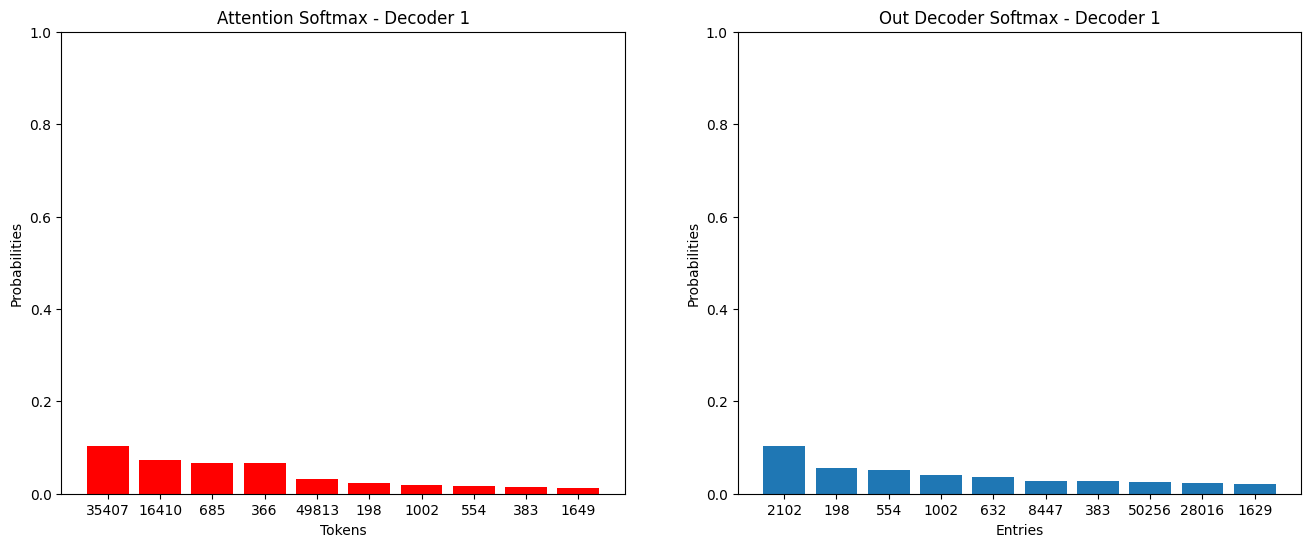

In [1]:
import os

import torch
import numpy as np
from scipy.spatial.distance import cosine
from scipy.stats import entropy

import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Define the directory containing the .pt files
directory = "/mnt/DATA/output_GEB/last_token_pdf/"

# Function to load the .pt file for a given decoder index
def load_decoder_softmax(decoder_index):
    file_path = os.path.join(directory, f"decoder_{decoder_index}/out_decoder_softmax.pt")
    return torch.load(file_path)

def load_attention_softmax(decoder_index):
    file_path = os.path.join(directory, f"decoder_{decoder_index}/attention_softmax.pt")
    return torch.load(file_path)

# Function to get the top 10 entries with higher probabilities
def get_top_10_entries(prob_dist):
    sorted_indices = np.argsort(prob_dist)
    top_10_indices = sorted_indices[-10:][::-1]
    top_10_probs = prob_dist[top_10_indices]
    return top_10_indices, top_10_probs

# Function to create a bar plot for a given decoder index
def create_bar_plot(decoder_index, ax1, ax2):
    # Load attention probabilities
    attention_softmax = load_attention_softmax(decoder_index)
    probs_attention = attention_softmax.detach().numpy()
    top_indices_attention, top_probs_attention = get_top_10_entries(probs_attention)
    
    ax1.bar(range(10), top_probs_attention, tick_label=top_indices_attention, color='red')
    ax1.set_ylim(0, 1)
    ax1.set_title(f"Attention Softmax - Decoder {decoder_index}")
    ax1.set_xlabel("Tokens")
    ax1.set_ylabel("Probabilities")
    
    # Load softmax probabilities
    decoder_softmax = load_decoder_softmax(decoder_index)
    probs_softmax = decoder_softmax.detach().numpy()
    top_indices_softmax, top_probs_softmax = get_top_10_entries(probs_softmax)
    
    ax2.bar(range(10), top_probs_softmax, tick_label=top_indices_softmax)
    ax2.set_ylim(0, 1)
    ax2.set_title(f"Out Decoder Softmax - Decoder {decoder_index}")
    ax2.set_xlabel("Entries")
    ax2.set_ylabel("Probabilities")

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Function to update the bar plots for each frame in the GIF
def update(frame):
    ax1.clear()
    ax2.clear()
    create_bar_plot(frame, ax1, ax2)

# Create animation
decoder_indices = list(range(1, 13))  # Including decoder 12
ani = animation.FuncAnimation(fig, update, frames=decoder_indices, repeat=False)

# Save the animation as a GIF
ani.save('probability_evolution.gif', writer='imagemagick', fps=0.3)

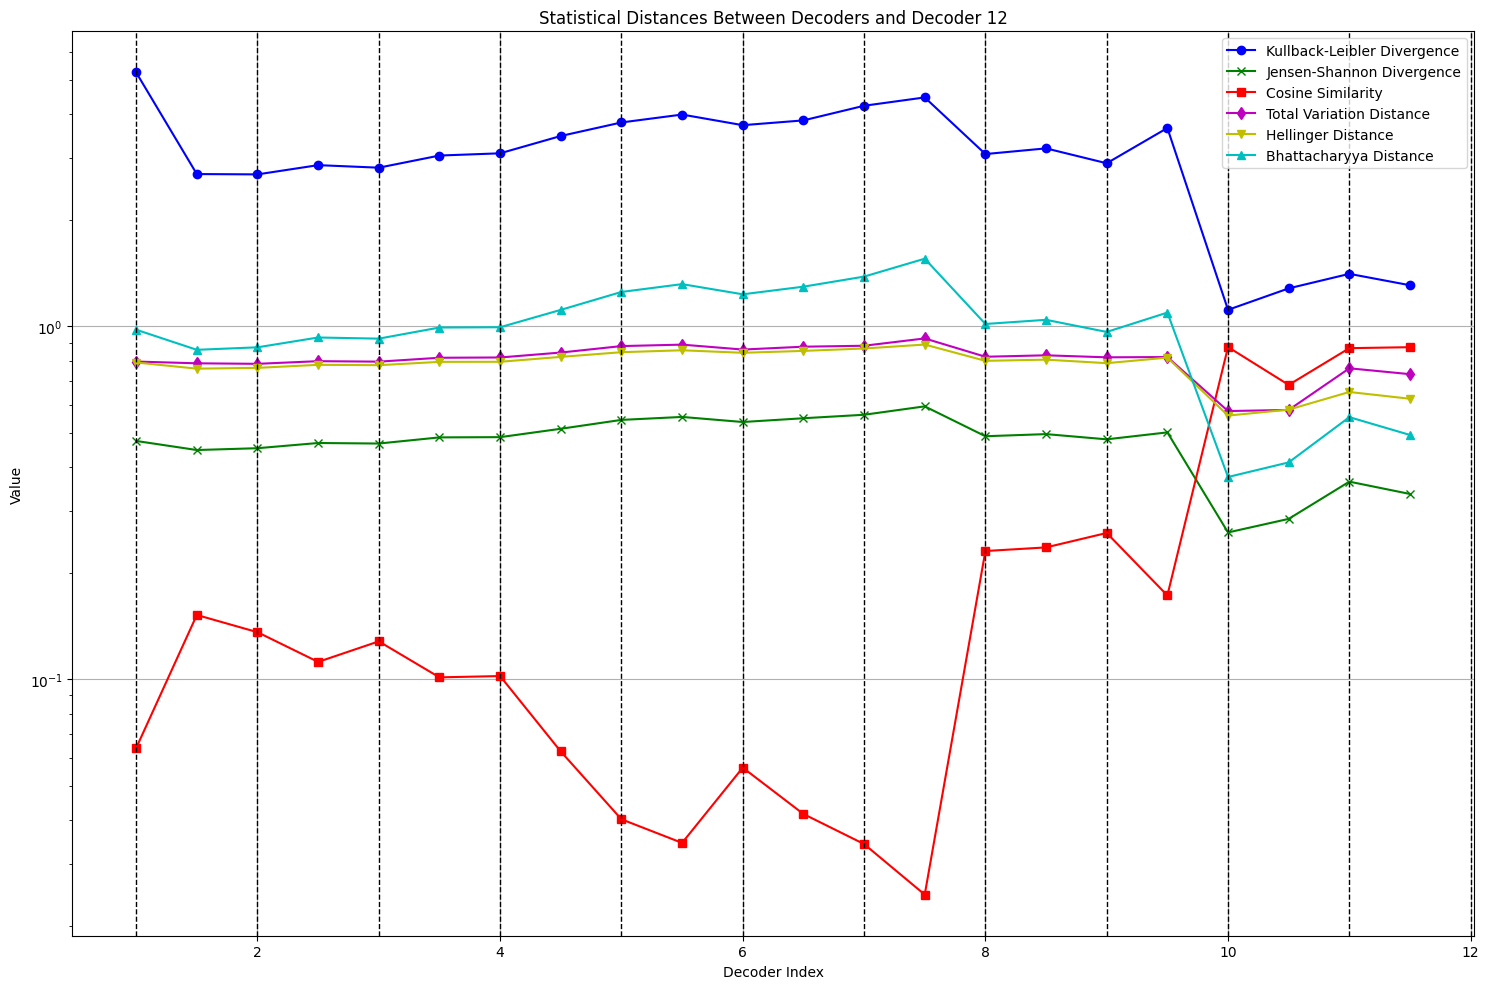

In [2]:
# Define the directory containing the .pt files
directory = "/mnt/DATA/output_GEB/last_token_pdf/"

# Function to load the .pt file for a given decoder index
def load_decoder_softmax(decoder_index):
    file_path = os.path.join(directory, f"decoder_{decoder_index}/out_decoder_softmax.pt")
    return torch.load(file_path)

def load_attention_softmax(decoder_index):
    file_path = os.path.join(directory, f"decoder_{decoder_index}/attention_softmax.pt")
    return torch.load(file_path)
    
# Function to calculate Kullback-Leibler divergence
def kl_divergence(p, q):
    return entropy(p, q)

# Function to calculate Jensen-Shannon divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

# Function to calculate cosine similarity
def cosine_similarity(p, q):
    return 1 - cosine(p, q)

# Function to calculate total variation distance
def total_variation_distance(p, q):
    return 0.5 * np.sum(np.abs(p - q))

# Function to calculate Hellinger distance
def hellinger_distance(p, q):
    return np.sqrt(0.5 * np.sum((np.sqrt(p) - np.sqrt(q)) ** 2))

# Function to calculate Bhattacharyya distance
def bhattacharyya_distance(p, q):
    return -np.log(np.sum(np.sqrt(p * q)))

# Load the probability distribution for decoder_12
decoder_12 = load_decoder_softmax(12)

# Initialize lists to store results
kl_divergences = []
js_divergences = []
cos_similarities = []
tv_distances = []
hellinger_distances = []
bhattacharyya_distances = []
decoder_indices = list(range(1, 12))

# Loop through decoders 1 to 11 and calculate distances
for i in decoder_indices:
    attention_i = load_attention_softmax(i)

    kl_div = kl_divergence(attention_i.detach().numpy(), decoder_12.detach().numpy())
    js_div = js_divergence(attention_i.detach().numpy(), decoder_12.detach().numpy())
    cos_sim = cosine_similarity(attention_i.detach().numpy(), decoder_12.detach().numpy())
    tv_dist = total_variation_distance(attention_i.detach().numpy(), decoder_12.detach().numpy())
    hellinger_dist = hellinger_distance(attention_i.detach().numpy(), decoder_12.detach().numpy())
    bhattacharyya_dist = bhattacharyya_distance(attention_i.detach().numpy(), decoder_12.detach().numpy())

    kl_divergences.append(kl_div)
    js_divergences.append(js_div)
    cos_similarities.append(cos_sim)
    tv_distances.append(tv_dist)
    hellinger_distances.append(hellinger_dist)
    bhattacharyya_distances.append(bhattacharyya_dist)
    
    decoder_i = load_decoder_softmax(i)

    kl_div = kl_divergence(decoder_i.detach().numpy(), decoder_12.detach().numpy())
    js_div = js_divergence(decoder_i.detach().numpy(), decoder_12.detach().numpy())
    cos_sim = cosine_similarity(decoder_i.detach().numpy(), decoder_12.detach().numpy())
    tv_dist = total_variation_distance(decoder_i.detach().numpy(), decoder_12.detach().numpy())
    hellinger_dist = hellinger_distance(decoder_i.detach().numpy(), decoder_12.detach().numpy())
    bhattacharyya_dist = bhattacharyya_distance(decoder_i.detach().numpy(), decoder_12.detach().numpy())

    kl_divergences.append(kl_div)
    js_divergences.append(js_div)
    cos_similarities.append(cos_sim)
    tv_distances.append(tv_dist)
    hellinger_distances.append(hellinger_dist)
    bhattacharyya_distances.append(bhattacharyya_dist)

# Plot the results in a single plot
plt.figure(figsize=(15, 10))

x_plot = np.arange(1, 12, 0.5)
plt.plot(x_plot, kl_divergences, marker='o', label='Kullback-Leibler Divergence', color='b')
plt.plot(x_plot, js_divergences, marker='x', label='Jensen-Shannon Divergence', color='g')
plt.plot(x_plot, cos_similarities, marker='s', label='Cosine Similarity', color='r')
plt.plot(x_plot, tv_distances, marker='d', label='Total Variation Distance', color='m')
plt.plot(x_plot, hellinger_distances, marker='v', label='Hellinger Distance', color='y')
plt.plot(x_plot, bhattacharyya_distances, marker='^', label='Bhattacharyya Distance', color='c')

plt.title('Statistical Distances Between Decoders and Decoder 12')
plt.xlabel('Decoder Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.yscale('log')

plt.tight_layout()

for i in np.arange(0, 12):
    plt.axvline(x=i+1, color='black', linestyle='--', linewidth=1)

plt.show()


## 1. Kullback-Leibler Divergence

The Kullback-Leibler Divergence is a measure of how one probability distribution $ Q $ diverges from a second, expected probability distribution $ P $.

$
D_{KL}(P \parallel Q) = \sum_{x} P(x) \log \left( \frac{P(x)}{Q(x)} \right)
$

## 2. Jensen-Shannon Divergence

The Jensen-Shannon Divergence is a method of measuring the similarity between two probability distributions. It is a symmetrized and smoothed version of the Kullback-Leibler divergence.

$
D_{JS}(P \parallel Q) = \frac{1}{2} D_{KL}(P \parallel M) + \frac{1}{2} D_{KL}(Q \parallel M)
$

where $ M = \frac{1}{2} (P + Q) $.

## 3. Cosine Similarity

Cosine Similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

$
\text{Cosine Similarity}(P, Q) = 1 - \frac{P \cdot Q}{\|P\| \|Q\|}
$

## 4. Total Variation Distance

The Total Variation Distance between two probability distributions is the maximum difference between the probabilities assigned to a single event.

$
D_{TV}(P, Q) = \frac{1}{2} \sum_{x} |P(x) - Q(x)|
$

## 5. Hellinger Distance

The Hellinger Distance is a measure of the difference between two probability distributions. It is related to the Bhattacharyya distance.

$
H(P, Q) = \frac{1}{\sqrt{2}} \sqrt{\sum_{x} (\sqrt{P(x)} - \sqrt{Q(x)})^2}
$

## 6. Bhattacharyya Distance

The Bhattacharyya Distance measures the similarity of two discrete or continuous probability distributions.
Achtung: does not obey the triangle inequality, so it isn't a metric.

$
D_B(P, Q) = -\ln \left( \sum_{x} \sqrt{P(x) Q(x)} \right)
$

## 7. Wasserstein Distance (Earth Mover's Distance)

The Wasserstein Distance measures the minimum "cost" of transforming one distribution into another. It is also known as the Earth Mover's Distance.

$
W(P, Q) = \inf_{\gamma \in \Gamma(P, Q)} \int_{\mathcal{X} \times \mathcal{Y}} d(x, y) \, d\gamma(x, y)
$

## 8. Chi-Square Distance

The Chi-Square Distance is based on the chi-square test statistic, used to compare observed data with data we would expect to obtain according to a specific hypothesis.

$
\chi^2(P, Q) = \sum_{x} \frac{(P(x) - Q(x))^2}{P(x)}
$

## 9. Mahalanobis Distance

The Mahalanobis Distance is a measure of the distance between a point and a distribution.

$
D_M(P, Q) = \sqrt{(P - Q)^T S^{-1} (P - Q)}
$

where $ S $ is the covariance matrix.
